### Link of the Matplotlib docs
##### https://docs.kanaries.net/pt/topics/Matplotlib/matplotlib-multiple-plots-on-same-figure

In [1]:
#importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import imageio
import os


In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('db_mt.xlsx', sheet_name='Sheet1')
print(df.head(10))

        date  value    liter
0 2017-12-31  190.2   301961
1 2018-12-31  192.9   545110
2 2019-12-31  194.8  1029190
3 2020-12-31  197.3  1997490
4 2021-12-31  200.8  2860097
5 2022-12-31  204.7  3209840
6 2023-12-31  208.2  4419242


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7 non-null      datetime64[ns]
 1   value   7 non-null      float64       
 2   liter   7 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 296.0 bytes


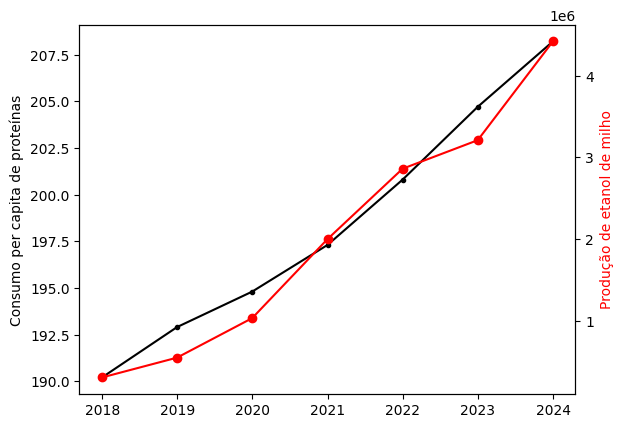

In [11]:
# Definindo as variaveis com as colunas do df
x = df['date']
y1 = df['value']
y2 = df['liter']


# Cria uma nova Figura e Axes
fig, ax1 = plt.subplots()
 
# Cria um segundo Axes que compartilha o mesmo eixo x
ax2 = ax1.twinx()
 
# Plotar dados em cada Axes
ax1.plot(x, y1, 'k-', label='value', marker='.')
ax2.plot(x, y2, 'r-', label='liter', marker='o')
 
# Definir rótulos dos eixos y
ax1.set_ylabel('Consumo per capita de proteínas', color='k', )
ax2.set_ylabel('Produção de etanol de milho', color='r')
 
# Mostrar o gráfico
plt.show()

In [4]:
df.drop(['liter'], axis = 1,inplace=True)

In [5]:
df.set_index('date',inplace=True)

In [6]:
df=df.sort_index(axis=0)
print(df.head(10))

            value
date             
2017-12-31  190.2
2018-12-31  192.9
2019-12-31  194.8
2020-12-31  197.3
2021-12-31  200.8
2022-12-31  204.7
2023-12-31  208.2


fh: Optional[int or list or np.array], default = 1

The forecast horizon to be used for forecasting. Default is set to 1 i.e. forecast one point ahead. When integer is passed it means N continuous points in the future without any gap. If you want to forecast values with gaps, you must pass an array e.g. np.arange([13, 25]) will skip the first 12 future points and forecast from the 13th point till the 24th point ahead (note in numpy right value is inclusive and left is exclusive).

In [7]:
exp = TSForecastingExperiment()
exp.setup(data=df, fh=1, session_id=42, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,42
1,Target,value
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(7, 1)"
5,Transformed data shape,"(7, 1)"
6,Transformed train set shape,"(6, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
exp.plot_model(plot="ts",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

## Checking Train-Test Split

In [9]:
exp.plot_model(plot="train_test_split",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

## Comparing Models

The most basic assumption of time series forecasting is that past patterns continue into the future. 
Based on this assumption, in the short-term future forecast, since the environment in which the data is generated is similar to the present, 
the uncertainty is small and the forecast can be well-predicted. However, as we move towards long-term future forecasting, the possibility of the environment in which data is generated is likely to change, and unpredictable situations occur, and as errors continue to accumulate, uncertainty about the forecast data is bound to increase.

We compare the performance of various models and try to select the 4 models with the best performance.

In [10]:
top4 = exp.compare_models(n_select = 4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:43:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Forecaster


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
theta,Theta Forecaster,0.3637,0.3578,0.9067,0.9067,0.0045,0.0045,0.0800
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.4052,0.3981,1.0266,1.0266,0.0051,0.0051,0.1800
exp_smooth,Exponential Smoothing,0.4075,0.4005,1.0287,1.0287,0.0051,0.0051,0.0700
polytrend,Polynomial Trend Forecaster,0.4076,0.4006,1.0289,1.0289,0.0051,0.0051,7.7233
ets,ETS,0.4076,0.4006,1.0289,1.0289,0.0051,0.0051,0.1000
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.4142,0.4068,1.0513,1.0513,0.0052,0.0052,11.8867
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.4269,0.4195,1.0742,1.0742,0.0053,0.0053,0.2000
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.4406,0.4326,1.1200,1.1200,0.0055,0.0055,0.4900
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.4406,0.4326,1.1200,1.1200,0.0055,0.0055,0.8167
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.4406,0.4326,1.1200,1.1200,0.0055,0.0055,5.5400


## Lag and Difference
Time series data modeling is to find patterns in the process of normalizing nonstationary time series data. 
Lag and difference are the most representative methods used in the process of making a stationary time series into a stationary time series.

## Difference Plot Using Order

In [11]:
exp.plot_model(plot="diff", 
               data_kwargs={"order_list": [1, 2], "acf": True, "pacf": True},
               fig_kwargs = {"height":700,"width":1000,"template": "simple_white","hoverinfo":"skip","big_data_threshold":10})

## ARIMA model

The ARIMA model is a model based on the Autoregression moving average (ARMA), 
but since the ARMA model is only a model for stationary time series, it is implemented as an ARIMA model including normalizing the abnormal data.

In [12]:
arima = exp.create_model('arima')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = arima, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,1.3880,1.3674,3.1923,3.1923,0.0162,0.0163
1,2020,1.7305,1.7129,4.0955,4.0955,0.0204,0.0206
2,2021,1.6827,1.6448,4.4591,4.4591,0.0218,0.0220
Mean,NaT,1.6004,1.5750,3.9156,3.9156,0.0195,0.0196
SD,NaT,0.1515,0.1494,0.5326,0.5326,0.0024,0.0024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]


## Theta Forecaster
The series is tested for seasonality using the test outlined in A&N. 
If deemed seasonal, the series is seasonally adjusted using a classical multiplicative decomposition before applying the theta method. The resulting forecasts are then reseasonalised.

In [13]:
theta = exp.create_model('theta')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = theta, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:48:34
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Theta Forecaster


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,0.0870,0.0857,0.2000,0.2000,0.0010,0.0010
1,2020,0.4986,0.4935,1.1800,1.1800,0.0059,0.0059
2,2021,0.5057,0.4943,1.3400,1.3400,0.0065,0.0066
Mean,NaT,0.3637,0.3578,0.9067,0.9067,0.0045,0.0045
SD,NaT,0.1957,0.1924,0.5039,0.5039,0.0025,0.0025


## ridge_cds_dt

In [14]:

ridge_cds_dt = exp.create_model('ridge_cds_dt')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ridge_cds_dt, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:48:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ridge w/ Cond. Deseasonalize & Detrending


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,0.0064,0.0063,0.0148,0.0148,0.0001,0.0001
1,2020,0.4909,0.4859,1.1618,1.1618,0.0058,0.0058
2,2021,0.7182,0.7020,1.9033,1.9033,0.0093,0.0093
Mean,NaT,0.4052,0.3981,1.0266,1.0266,0.0051,0.0051
SD,NaT,0.2968,0.2907,0.7769,0.7769,0.0038,0.0038


## exp_smooth	

In [15]:

exp_smooth = exp.create_model('exp_smooth')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = exp_smooth, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:48:39
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Exponential Smoothing


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,0.0289,0.0285,0.0665,0.0665,0.0003,0.0003
1,2020,0.5069,0.5017,1.1996,1.1996,0.0060,0.0060
2,2021,0.6868,0.6713,1.8200,1.8200,0.0089,0.0089
Mean,NaT,0.4075,0.4005,1.0287,1.0287,0.0051,0.0051
SD,NaT,0.2776,0.2720,0.7260,0.7260,0.0036,0.0036


## polytrend

In [16]:

polytrend = exp.create_model('polytrend')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = polytrend, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:48:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Polynomial Trend Forecaster


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,0.0290,0.0286,0.0667,0.0667,0.0003,0.0003
1,2020,0.5070,0.5019,1.2000,1.2000,0.0060,0.0060
2,2021,0.6868,0.6713,1.8200,1.8200,0.0089,0.0089
Mean,NaT,0.4076,0.4006,1.0289,1.0289,0.0051,0.0051
SD,NaT,0.2776,0.2720,0.7259,0.7259,0.0036,0.0036


## ETS
The ETS algorithm is especially useful for datasets with seasonality and other prior assumptions about the data. 

ETS computes a weighted average over all observations in the input time series dataset as its prediction. 

The weights are exponentially decreasing over time, rather than the constant weights in simple moving average methods. 

The weights are dependent on a constant parameter, which is known as the smoothing parameter.

In [17]:
ets_dt = exp.create_model('ets')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ets_dt, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:48:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,ETS


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,0.0290,0.0286,0.0667,0.0667,0.0003,0.0003
1,2020,0.5070,0.5019,1.2000,1.2000,0.0060,0.0060
2,2021,0.6868,0.6713,1.8200,1.8200,0.0089,0.0089
Mean,NaT,0.4076,0.4006,1.0289,1.0289,0.0051,0.0051
SD,NaT,0.2776,0.2720,0.7259,0.7259,0.0036,0.0036


## ALL GRAPHS

In [18]:
exp.plot_model(estimator = ridge_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = exp_smooth, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = polytrend, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = theta, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ets_dt, plot = 'forecast',
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
               

## LITER

In [19]:
#Agora vamos importar nosso arquivo 
df = pd.read_excel('db_mt.xlsx', sheet_name='Sheet1')
print(df.head(10))

        date  value    liter
0 2017-12-31  190.2   301961
1 2018-12-31  192.9   545110
2 2019-12-31  194.8  1029190
3 2020-12-31  197.3  1997490
4 2021-12-31  200.8  2860097
5 2022-12-31  204.7  3209840
6 2023-12-31  208.2  4419242


In [20]:
df.drop(['value'], axis = 1,inplace=True)

In [21]:
df.set_index('date',inplace=True)

In [22]:
df=df.sort_index(axis=0)
print(df.head(10))

              liter
date               
2017-12-31   301961
2018-12-31   545110
2019-12-31  1029190
2020-12-31  1997490
2021-12-31  2860097
2022-12-31  3209840
2023-12-31  4419242


In [23]:
exp = TSForecastingExperiment()
exp.setup(data=df, fh=1, session_id=15, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,15
1,Target,liter
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(7, 1)"
5,Transformed data shape,"(7, 1)"
6,Transformed train set shape,"(6, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [24]:
exp.plot_model(plot="ts",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})


In [25]:
exp.plot_model(plot="train_test_split",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})


In [26]:
top4 = exp.compare_models(n_select = 4)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:49:06
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Forecaster


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
theta,Theta Forecaster,0.8966,0.8327,406542.6589,406542.6589,0.1688,0.1875,0.0967
polytrend,Polynomial Trend Forecaster,0.9415,0.8718,417119.4556,417119.4556,0.1769,0.2030,0.0567
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.9535,0.8789,428580.5333,428580.5333,0.1798,0.2073,0.4000
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9581,0.8867,420193.3110,420193.3110,0.1799,0.2090,0.8133
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.0139,0.9396,440596.6227,440596.6227,0.1900,0.2238,0.1233
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.0417,0.9625,461486.2807,461486.2807,0.1959,0.2301,5.9633
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.0639,0.9837,468735.7000,468735.7000,0.1999,0.2363,7.1567
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0639,0.9837,468735.6764,468735.6764,0.1999,0.2363,0.5500
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.0639,0.9837,468733.6971,468733.6971,0.1999,0.2363,1.4967
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.0681,0.9876,471440.8787,471440.8787,0.2008,0.2371,4.8367


## Lag and Difference
Time series data modeling is to find patterns in the process of normalizing nonstationary time series data.
 
Lag and difference are the most representative methods used in the process of making a stationary time series into a stationary time series.

In [27]:
exp.plot_model(plot="diff", 
               data_kwargs={"order_list": [1, 2], "acf": True, "pacf": True},
               fig_kwargs = {"height":700,"width":1000,"template": "simple_white","hoverinfo":"skip","big_data_threshold":10})


## lightgbm_cds_dt	

In [28]:
light = exp.create_model('lightgbm_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = light, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,1.8286,1.7359,664918.2507,664918.2507,0.3329,0.3993
1,2020,0.9826,0.8670,555366.9323,555366.9323,0.1942,0.2151
2,2021,0.0630,0.0573,40294.7500,40294.7500,0.0126,0.0125
Mean,NaT,0.9581,0.8867,420193.3110,420193.3110,0.1799,0.2090
SD,NaT,0.7210,0.6854,272326.4711,272326.4711,0.1312,0.1580


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## ada_cds_dt

In [29]:
ada = exp.create_model('ada_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ada, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,1.6630,1.5786,604685.5000,604685.5000,0.3027,0.3567
1,2020,1.1391,1.0050,643786.9000,643786.9000,0.2251,0.2536
2,2021,0.0583,0.0530,37269.2000,37269.2000,0.0116,0.0117
Mean,NaT,0.9535,0.8789,428580.5333,428580.5333,0.1798,0.2073
SD,NaT,0.6681,0.6292,277158.9791,277158.9791,0.1231,0.1446


## polytrend

In [30]:
polytrend = exp.create_model('polytrend')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = polytrend, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,1.7734,1.6834,644840.6667,644840.6667,0.3228,0.3850
1,2020,0.8829,0.7790,498992.5000,498992.5000,0.1745,0.1911
2,2021,0.1681,0.1530,107525.2000,107525.2000,0.0335,0.0329
Mean,NaT,0.9415,0.8718,417119.4556,417119.4556,0.1769,0.2030
SD,NaT,0.6567,0.6282,226869.0874,226869.0874,0.1181,0.1440



## Theta Forecaster
The series is tested for seasonality using the test outlined in A&N. 
If deemed seasonal, the series is seasonally adjusted using a classical multiplicative decomposition before applying the theta method. The resulting forecasts are then reseasonalised.

In [31]:
theta = exp.create_model('theta')
#exp.plot_model(plot = 'decomp',
#               data_kwargs = {'type' : 'multiplicative'},
#               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = theta, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,1.6671,1.5826,606198.3973,606198.3973,0.3035,0.3578
1,2020,0.5467,0.4824,308994.2675,308994.2675,0.1080,0.1142
2,2021,0.4760,0.4332,304435.3119,304435.3119,0.0948,0.0906
Mean,NaT,0.8966,0.8327,406542.6589,406542.6589,0.1688,0.1875
SD,NaT,0.5456,0.5306,141190.1942,141190.1942,0.0954,0.1208


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## XGBoost

In [32]:
xgboost = exp.create_model('xgboost_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = xgboost, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10},
               return_data=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:51:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting w/ Cond. Deseasonali...


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019,1.9943,1.8931,725150.9792,725150.9792,0.3630,0.4435
1,2020,1.1391,1.0050,643786.8906,643786.8906,0.2251,0.2536
2,2021,0.0583,0.0530,37269.1594,37269.1594,0.0116,0.0117
Mean,NaT,1.0639,0.9837,468735.6764,468735.6764,0.1999,0.2363
SD,NaT,0.7922,0.7514,306895.7969,306895.7969,0.1446,0.1767


{'original_data': date
 2017     301961
 2018     545110
 2019    1029190
 2020    1997490
 2021    2860097
 2022    3209840
 2023    4419242
 Freq: A-DEC, Name: liter, dtype: int64,
 'overlay_data':       XGBRegressor
 2023  4.143106e+06
 2024  4.492849e+06
 2025  5.426115e+06
 2026  5.775858e+06
 2027  6.709124e+06
 2028  7.058867e+06
 2029  7.992133e+06
 2030  8.341876e+06}

In [33]:
exp.plot_model(estimator = light, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ada, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = polytrend, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = theta, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = xgboost, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})